<hr>
<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#823939"><i>Project Cars4U</i><br><hr></span>


#### <span style="font-family: Arial; font-weight:bold; color:#823939"> Context:</span>
<ul>
    <li>there could be a lot of factor what influence the price of a used car, the question is if we are able to find the most important features, dependencies that have effect on the price</li>
    <li>older cars are mostly cheaper than newest ones is it always the rule or the number of preowners influence the price</li>
    <li>do we have all the factors in the dataset or missing any yet?</li>
    <li>I will use a linear regression model to check the effects of variables</li>
</ul>
<br><hr>
    
#### <span style="font-family: Arial; font-weight:bold; color:#823939">Problem definition:</span>

<ul>
<li>We have to define the <strong>dependent</strong> and <strong>independent</strong> variables and find the <strong>correlation</strong> among them</li>
    <li>what are the impact of variables to the price of the cars</li>
    <li>how can we convert the data for the successfully analysing</li>
    <li>are the cars with automatic transmission more expensive than the manual ones?</li>
    <li>what are the factors they influence deeply the price</li>
    
</ul>
    
    
    
<br><hr>

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Data Dictionary 

<ul>

<li>S.No. : Serial Number</li>
<li>Name : Name of the car which includes Brand name and Model name</li>
<li>Location : The location in which the car is being sold or is available for purchase Cities</li>
<li>Year : Manufacturing year of the car</li>
<li>Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.</li>
<li>Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)</li>
<li>Transmission : The type of transmission used by the car. (Automatic / Manual)</li>
<li>Owner : Type of ownership</li>
<li>Mileage : The standard mileage offered by the car company in kmpl or km/kg</li>
<li>Engine : The displacement volume of the engine in CC.</li>
<li>Power : The maximum power of the engine in bhp.</li>
<li>Seats : The number of seats in the car.</li>
<li>New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)</li>
<li>Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)</li>
    
</ul>
    
<hr>
   <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Concept</span>
   <ol>    
    <li>Data overview</li>
       <li>Data preparation/Handling missing values</li>
       <li>Univariate Analysis/Data visualization</li>
       <li>Detection of outliers</li>
       <li>Bi-/Multi variate Analysis</li>
    <li>Preparation of data for the Model</li>
       <li>Modell building</li>
       <li>Train, evaluate and choosing model</li>
<hr>
    
    
    
    

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
#enable the plotting in Notebook
%matplotlib inline   
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# For performance checkinh
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# to limit display rows
pd.set_option('display.max_rows', 50)

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Load data

In [2]:
data = pd.read_csv("used_cars_data.csv")
df=data.copy()

data.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4703,4703,Honda Amaze S i-Vtech,Jaipur,2014,41210,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,4.40
2260,2260,BMW 5 Series 520d Luxury Line,Ahmedabad,2012,95000,Diesel,Automatic,Second,22.48 kmpl,1995 CC,190 bhp,5.0,63.71 Lakh,17.50
4921,4921,Hyundai i20 Sportz 1.2,Mumbai,2016,24001,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,NaN,5.75
2231,2231,Maruti Celerio ZXI MT,Kochi,2017,21799,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,5.69 Lakh,5.11
7110,7110,Tata Zest Quadrajet 1.3 75PS XE,Kolkata,2017,22000,Diesel,Manual,First,22.95 kmpl,1248 CC,74 bhp,5.0,7.94 Lakh,NaN


# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Data Overview </span><hr>

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check of data types 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check column names

In [4]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Number of rows and columns

In [5]:
df.shape

(7253, 14)

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check missing values

In [6]:
df.isna().sum() #check the number of missing values

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> create a percent rate of missung values

In [7]:
(df.isnull().sum()/df.shape[0])*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

## Observation
<hr><br>
<li>Number of rows:7253, Number of columns:12</li>
<li>Columns have units in text should be removed</li>
<li>Dependent variable is the price</li>
<li>Types should be partly converted</li>

# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Data preparation/Handling missing values </span><hr>

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Drop not necessary columns

In [8]:
df.drop(['S.No.','Name'], axis=1, inplace=True)

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> drop rows with missing values

In [9]:
df.dropna(subset=['Price'], inplace=True) #drop rows with missing values in the column Price

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Remove unit text from columns

In [10]:
df['Power']=df['Power'].str.replace('bhp','')
df['Mileage']=df['Mileage'].str.replace('kmpl','')
df['Mileage']=df['Mileage'].str.replace('km/kg','')
df['Engine']=df['Engine'].str.replace('CC','')
df['New_Price']=df['New_Price'].str.replace('Lakh','')
df['New_Price']=df['New_Price'].str.replace('Cr','')

## <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">  replacíng 'null' to NaN

In [11]:
df['Power']=df['Power'].replace('null ',np.nan)

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">convert types of data

In [12]:
df['Mileage']=df['Mileage'].astype(float)
df['Engine']=df['Engine'].astype(float)
df['Power']=df['Power'].astype(float)
df['Seats']=df['Seats'].astype(float)
df['New_Price']=df['New_Price'].astype(float)

In [13]:
df.skew()

Year                 -0.845802
Kilometers_Driven    58.724662
Mileage              -0.431742
Engine                1.421474
Power                 1.916481
Seats                 1.835792
New_Price             1.814672
Price                 3.335232
dtype: float64

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Use mean for missing values

In [14]:
df['Mileage'].fillna(df['Mileage'].mean(),inplace=True)

<li>Mileage skewness is between -1 and 1 so I used mean to fill out the missing values</li>

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Use median for missing values

In [15]:
medianFiller = lambda x: x.fillna(x.median())
num_col = ['Engine','Power']
df[num_col] = df[num_col].apply(medianFiller,axis=0)

<li>as the skewness is greater than 1, I use median to fill the missing values at Engine, Power</li>

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Use mode for missing values

In [16]:
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)

<li>Seats have the be a whole number (integer) so I used a mode to replace misiing values</li>

In [17]:
df.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2838,Kochi,2016,72132,Diesel,Automatic,Second,12.07,2967.0,241.40,7.0,NaN,39.00
3017,Kolkata,2018,2971,Petrol,Automatic,First,13.60,1598.0,181.00,4.0,NaN,39.75
2010,Mumbai,2017,12000,Petrol,Manual,First,17.00,1198.0,73.75,5.0,NaN,5.40
5255,Hyderabad,2014,60000,Diesel,Manual,First,23.20,1248.0,73.94,5.0,NaN,4.35
280,Kochi,2016,32227,Petrol,Manual,First,22.74,796.0,47.30,5.0,NaN,3.26
5301,Delhi,2011,72000,Diesel,Automatic,First,17.05,1995.0,184.00,5.0,NaN,11.00
4193,Coimbatore,2016,44340,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.83
3981,Hyderabad,2016,36778,Diesel,Manual,First,22.77,1498.0,98.59,5.0,NaN,8.80
5823,Delhi,2014,51000,Diesel,Automatic,First,17.20,1968.0,138.03,5.0,NaN,13.00
3894,Hyderabad,2010,250000,Diesel,Manual,Second,12.80,2494.0,102.00,7.0,NaN,6.50


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check the converted data types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  New_Price          824 non-null    float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 611.3+ KB


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Seats and Engine can be converted to integer

In [19]:
df['Engine']=df['Engine'].astype(int)
df['Seats']=df['Seats'].astype(int)

# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">summarizing data

In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # 2 digits for number formats
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.36,3.27,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.38,91268.84,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.13,4.58,0.0,15.17,18.15,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.51,599.64,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.88,53.28,34.2,78.0,97.7,138.03,560.0
Seats,6019.0,NaN,NaN,NaN,5.28,0.81,0.0,5.0,5.0,5.0,10.0



## Observation
<hr><br>
<ol>
    <li>Mileage, Engine is an object and should be integer</li>
    <li>Depentend variable is the price, independent variables are Mileage, Kilometers_Driven, Engine, Power</li>
    <li>Location, Year, Fuel_Type, Transmission, Owner_Type, Seats are categorical variable</li>
    <li>years are batween 1998 and 2019</li>
        

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Univariate Analysis/Data visualization

In [21]:
df.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,NaN,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,NaN,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,NaN,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,NaN,17.74
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5,NaN,2.35
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5,NaN,3.50
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,21.00,17.50
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.60,5,NaN,5.20
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248,74.00,5,NaN,1.95


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check the dependent variable "Price"

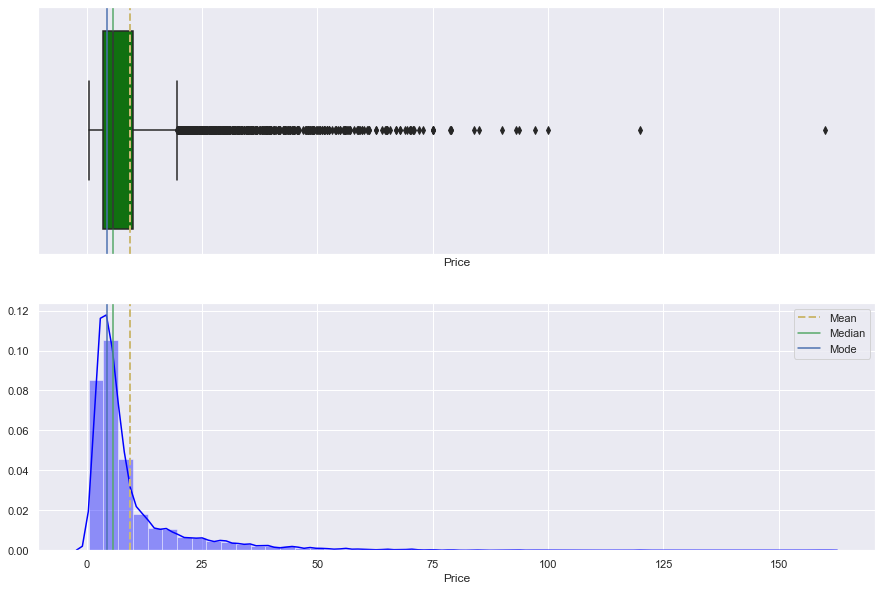

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,10))
mean=df['Price'].mean() 
median=df['Price'].median()
mode=df['Price'].mode()[0]


sns.boxplot(df['Price'], ax=ax_box, color='green')
ax_box.axvline(mean, color='y', linestyle='--',linewidth=2)
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df['Price'], ax=ax_hist, color='blue')
ax_hist.axvline(mean, color='y', linestyle='--', linewidth=2)
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})



In [23]:
print({'Mean':mean,'Median':median,'Mode':mode})

{'Mean': 9.479468350224273, 'Median': 5.64, 'Mode': 4.5}



## Observation
<hr>
<ul>
    <li>right skewed is the price mean is much more higher then median</li>
    <li>Mean is approx. 9,48 INR</li>

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Explore Mileage

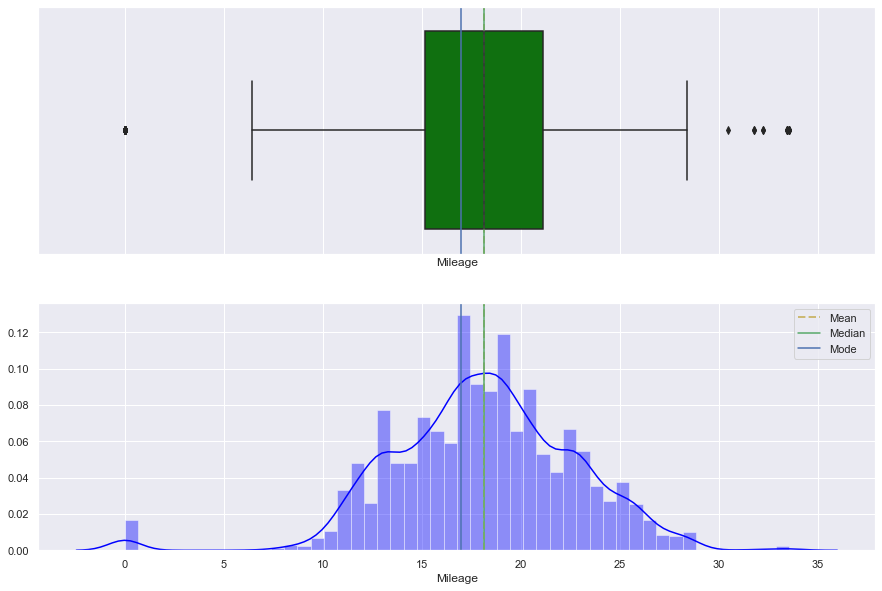

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,10))
mean=df['Mileage'].mean() 
median=df['Mileage'].median()
mode=df['Mileage'].mode()[0]


sns.boxplot(df['Mileage'], ax=ax_box, color='green')
ax_box.axvline(mean, color='y', linestyle='--',linewidth=2)
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df['Mileage'], ax=ax_hist, color='blue')
ax_hist.axvline(mean, color='y', linestyle='--', linewidth=2)
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [25]:
print({'Mean':mean,'Median':median,'Mode':mode})

{'Mean': 18.134960943992073, 'Median': 18.15, 'Mode': 17.0}



## Observation
<hr>
<ul>
    <li>Mileage is normal distributed plot is bellcurved</li>
    <li>Mean is near to median both are approx. 18 kmpl (km/kg)</li>

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Have a look to Engine

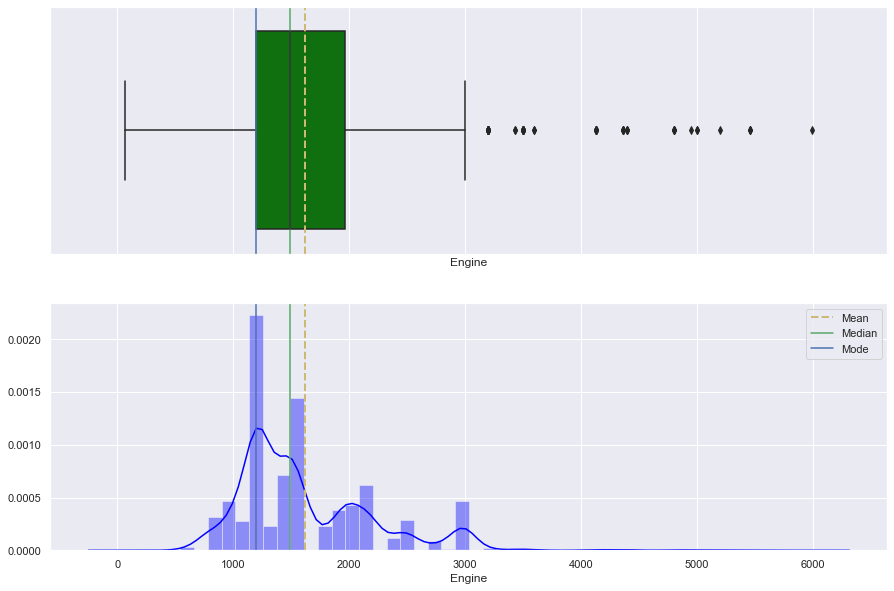

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,10))
mean=df['Engine'].mean() 
median=df['Engine'].median()
mode=df['Engine'].mode()[0]


sns.boxplot(df['Engine'], ax=ax_box, color='green')
ax_box.axvline(mean, color='y', linestyle='--',linewidth=2)
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df['Engine'], ax=ax_hist, color='blue')
ax_hist.axvline(mean, color='y', linestyle='--', linewidth=2)
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [27]:
print({'Mean':mean,'Median':median,'Mode':mode})

{'Mean': 1620.5092208007975, 'Median': 1493.0, 'Mode': 1197}



## Observation
<hr>
<ul>
    <li>Mean and median are not far from each other mode is 1197 means that in the dataset are more cars with smaller engine</li>

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Feel the Power

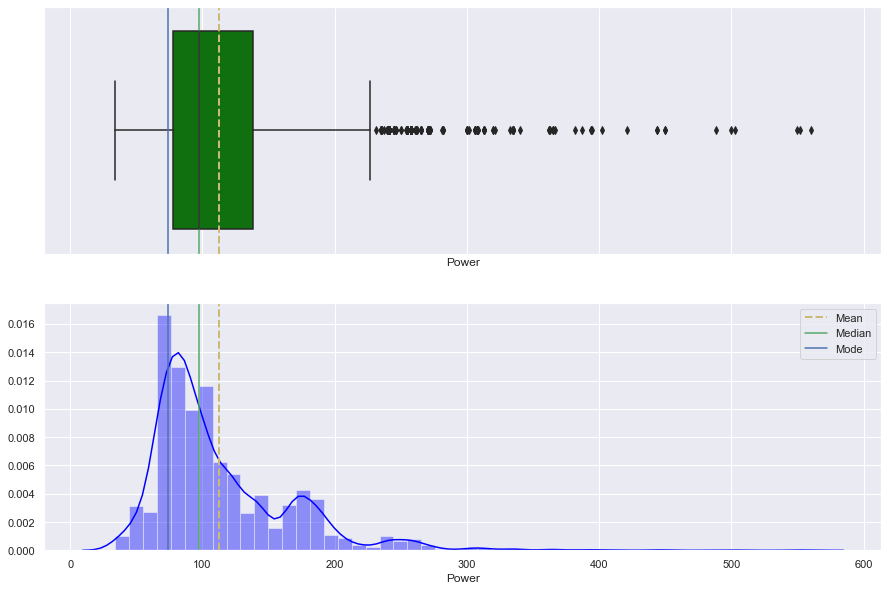

In [28]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,10))
mean=df['Power'].mean() 
median=df['Power'].median()
mode=df['Power'].mode()[0]


sns.boxplot(df['Power'], ax=ax_box, color='green')
ax_box.axvline(mean, color='y', linestyle='--',linewidth=2)
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df['Power'], ax=ax_hist, color='blue')
ax_hist.axvline(mean, color='y', linestyle='--', linewidth=2)
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [29]:
print({'Mean':mean,'Median':median,'Mode':mode})

{'Mean': 112.88353879381864, 'Median': 97.7, 'Mode': 74.0}



## Observation
<hr>
<ul>
    <li>Power is right skewed but the median is near to mean, tha average power is approx. 113 bhp</li>
   

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Numerical variables distribution

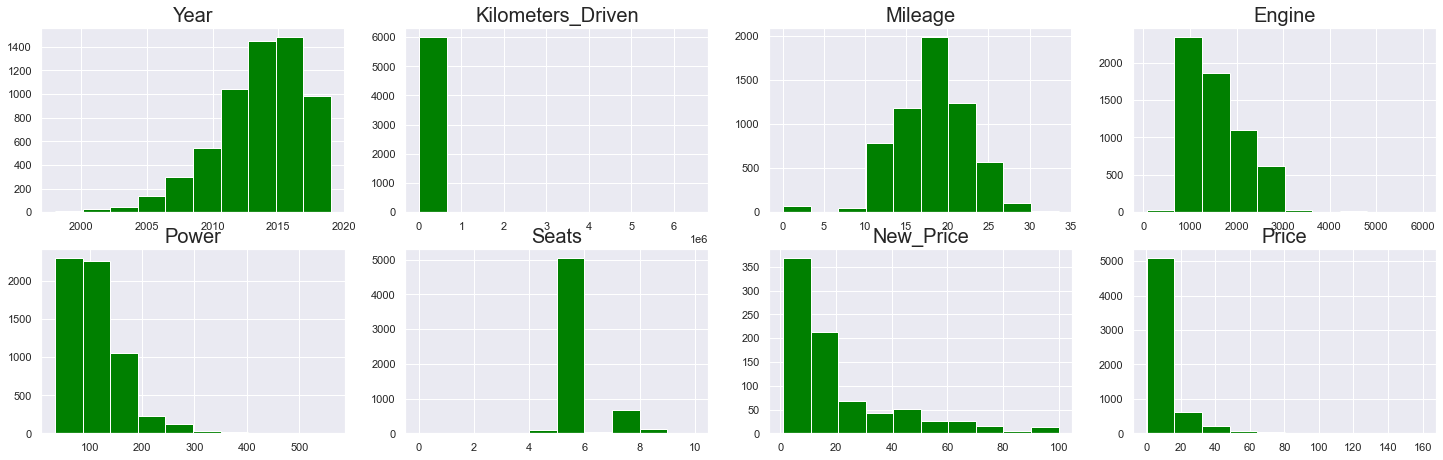

In [30]:
from scipy.stats import norm
col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(25,40))

for c in range(len(col)):
    plt.subplot(10,4,c+1)
    plt.hist(df[col[c]], color='green')
    plt.title(col[c],fontsize=20)

<li>Mileage show normal distribution</li>
<li>Engine, Power, Price right skewed that means in the dataset are chaeper models with less power and smaller engine</li>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   int32  
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int32  
 10  New_Price          824 non-null    float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 564.3+ KB


# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Detection of outliers

In [65]:
df_outl= df[['Mileage','Engine','Power','Kilometers_Driven', 'New_Price']]

Mileage                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Engine               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Power                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Kilometers_Driven    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
New_Price              AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

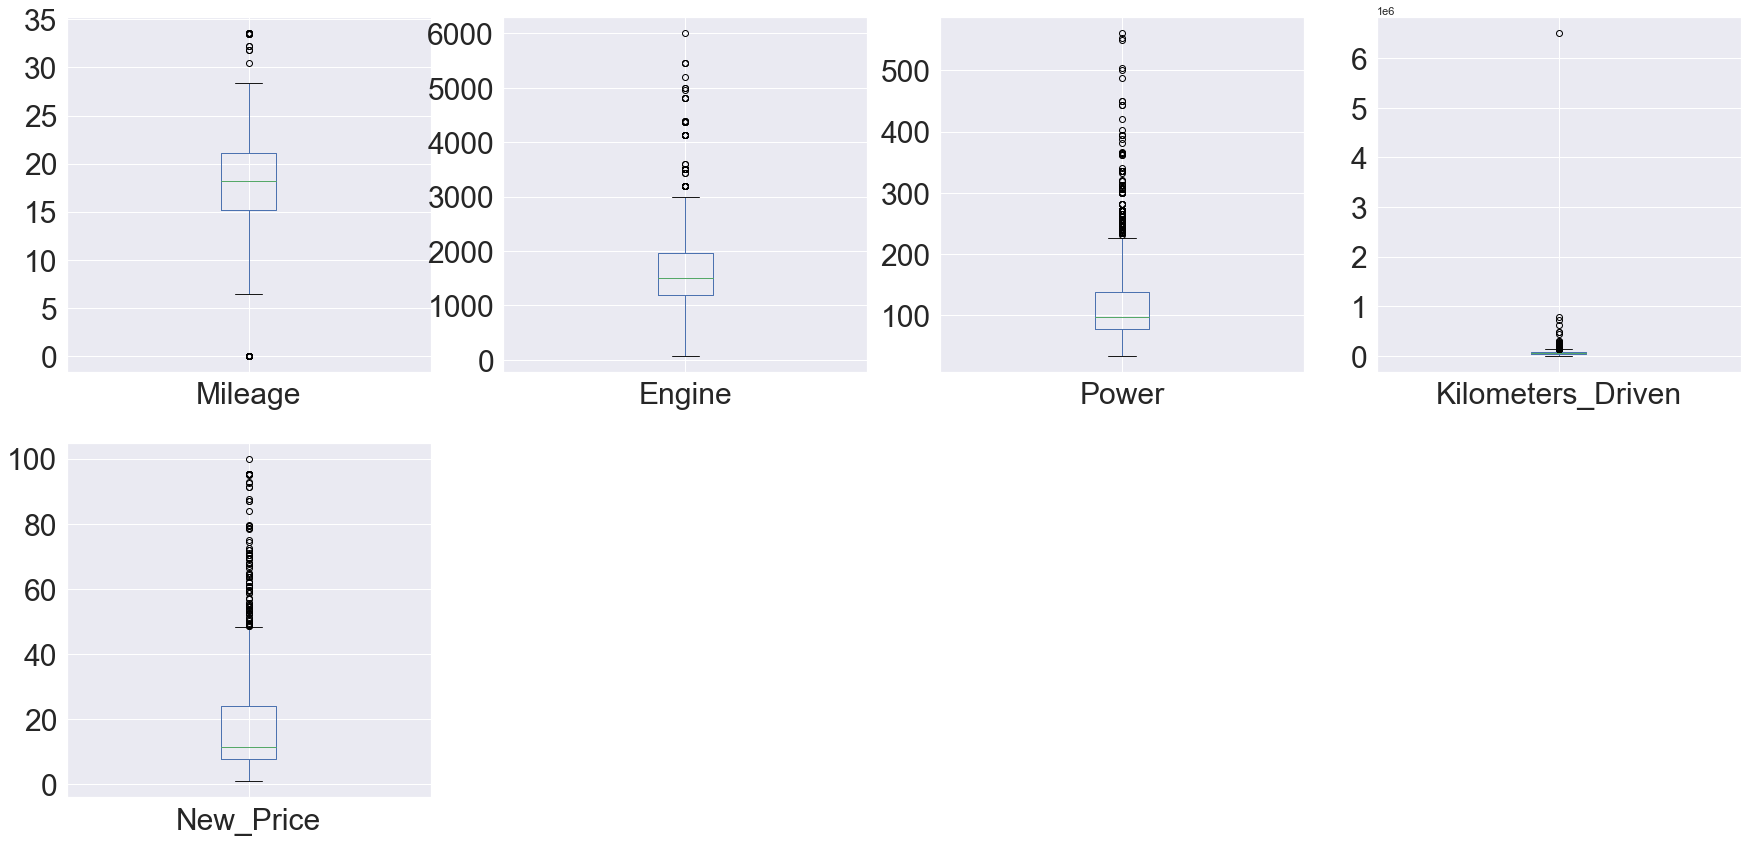

In [33]:
df_outl.plot(kind='box', subplots=True, layout=(4,4), fontsize=30, figsize = (30, 30))

<li>All the numerical columns have upper outliers</li>
<li>we have to treat these outliers because could be have a big effect on our predective model</li>

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Bi-/Multi variate Analysis

In [34]:
df_corr=df.drop('Year', axis=1)

In [35]:
df_corr=df_corr.corr()

In [36]:
df_corr

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Kilometers_Driven,1.00,-0.07,0.09,0.03,0.08,0.00,-0.01
Mileage,-0.07,1.00,-0.59,-0.50,-0.30,-0.33,-0.31
Engine,0.09,-0.59,1.00,0.86,0.39,0.61,0.66
Power,0.03,-0.50,0.86,1.00,0.10,0.72,0.77
Seats,0.08,-0.30,0.39,0.10,1.00,-0.01,0.05
New_Price,0.00,-0.33,0.61,0.72,-0.01,1.00,0.69
Price,-0.01,-0.31,0.66,0.77,0.05,0.69,1.00


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check the correlation with a heat map

<AxesSubplot:>

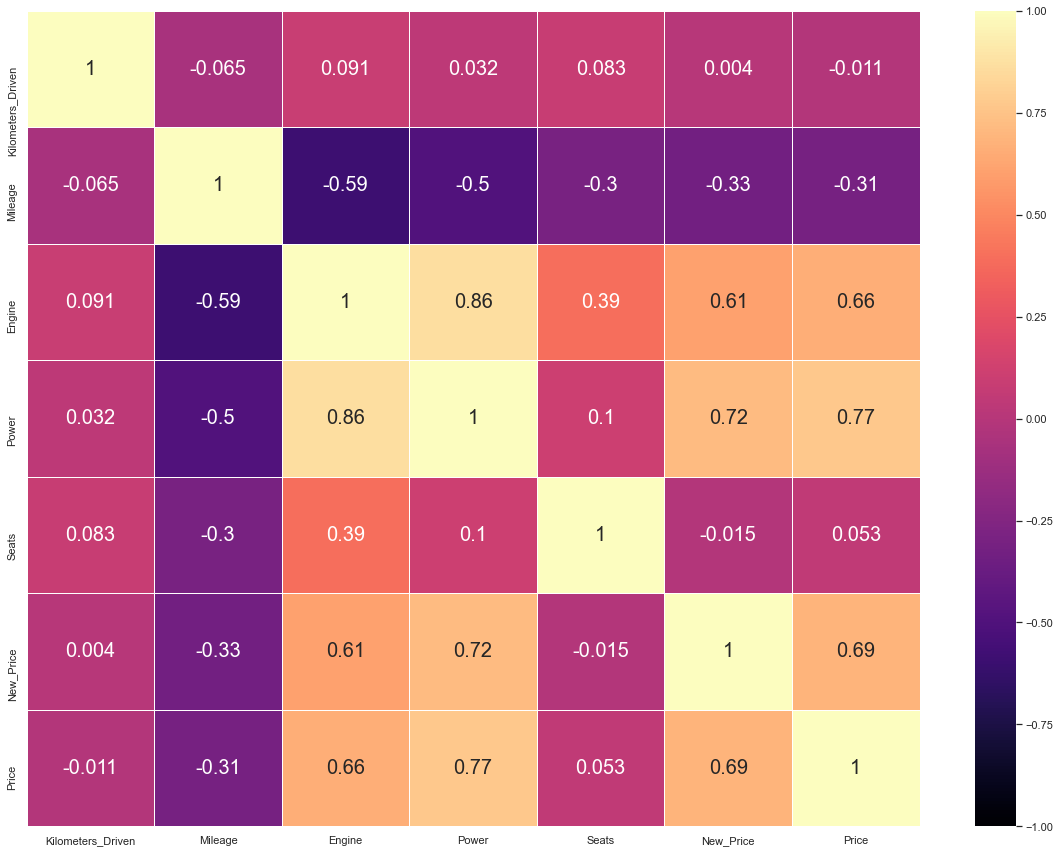

In [37]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_corr, annot=True,annot_kws={"size": 20}, linewidths=1, vmax=1, vmin=-1, center=0, cmap='magma')

<strong>Positiv correlation:</strong>
    <li>Price is highly correlated with power with power (0,7-1)</li>
    <li>Price is moderate correlated with engine</li><br>
<strong>Negativ correlation:</strong>
    <li>Price is negativ week correlated with Mileage</li><br>
<strong>No significant correlation:</strong>  
    <li>Price has no significant correlation with Kilometers Driven and Seats</li>

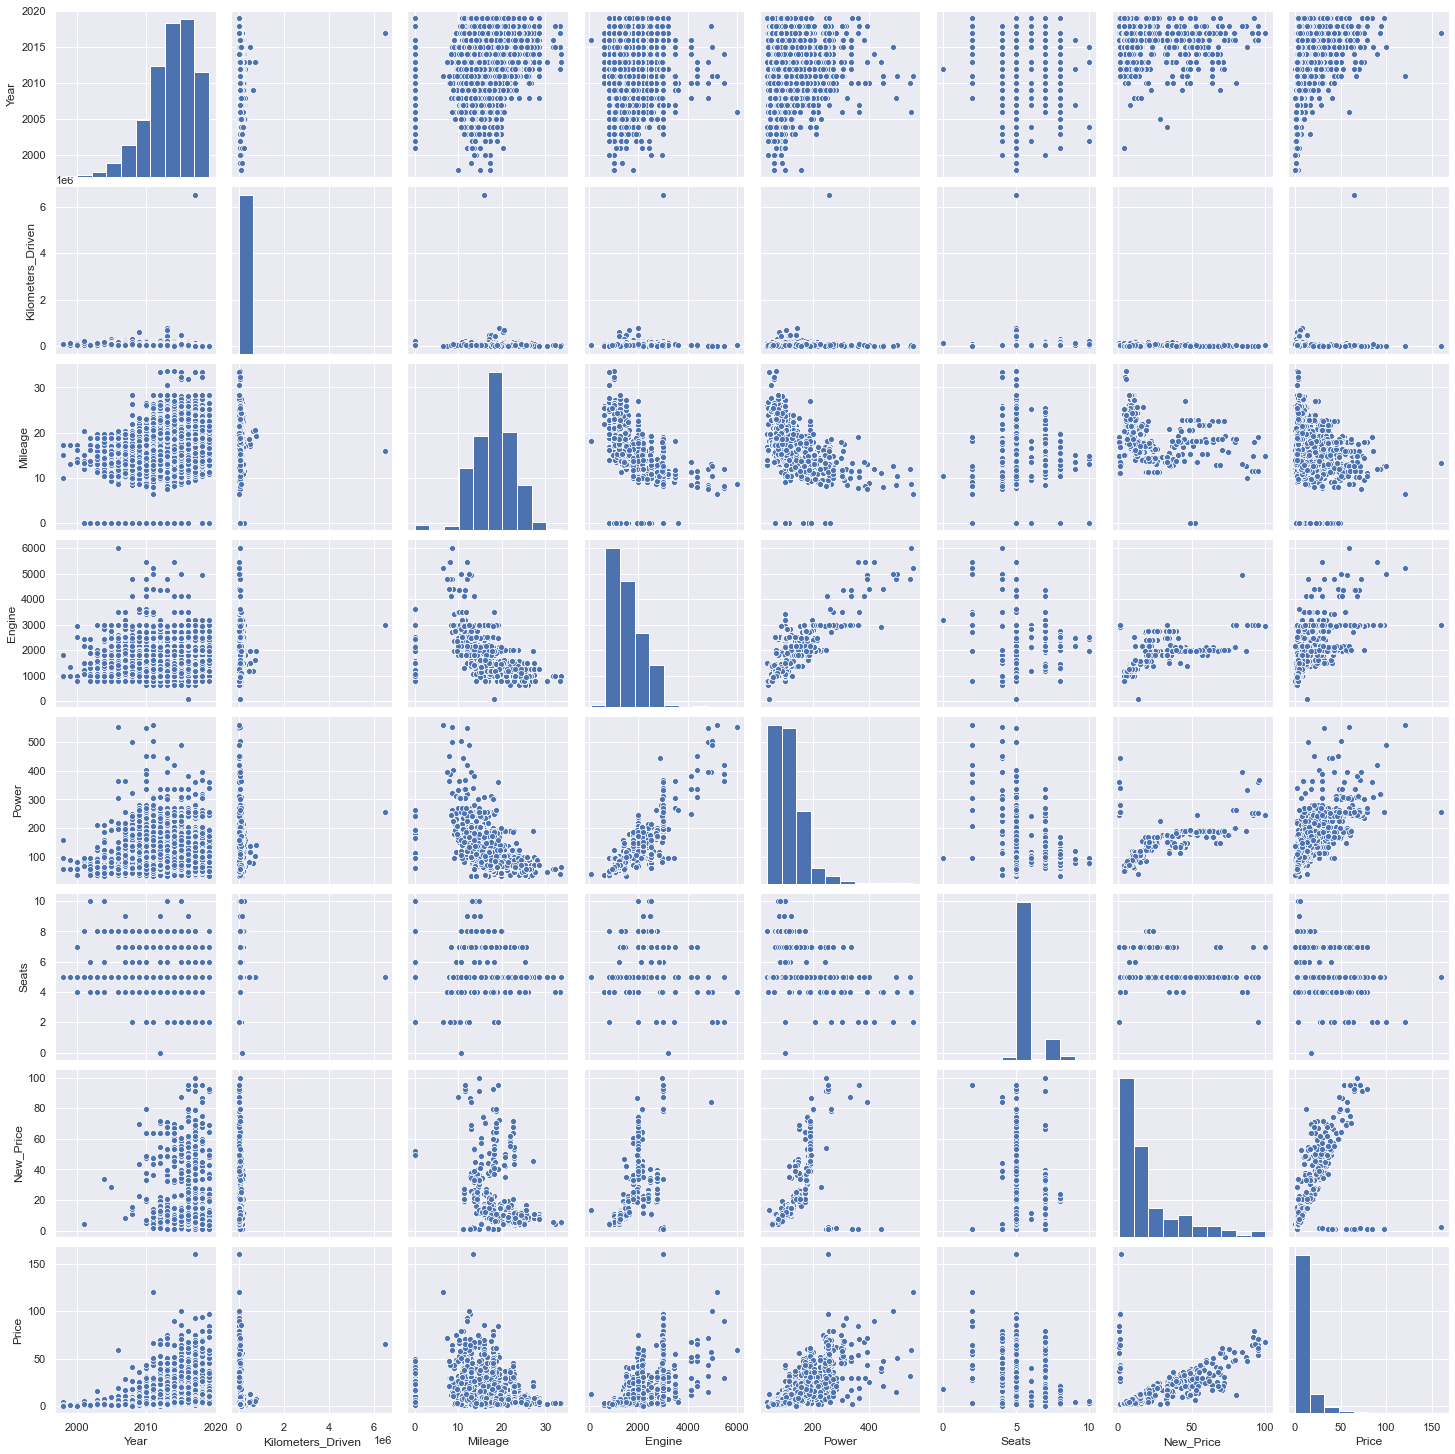

In [38]:
sns.pairplot(df)


## Observation
<hr>
<ul>
    <li>Price has positiv cerrelation with power and engine</li>
    <li>Price has negatic cerrelation with mileage</li>
</ul>

# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Kilometers driven vs. price regarding the type of transmission

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

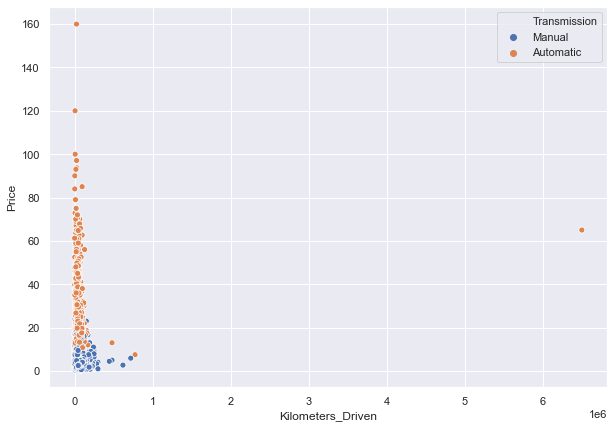

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='Price', x='Kilometers_Driven', hue='Transmission', data=df)

<li>Cars with manuel transmission are cheaper then automatic ones</li>

# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Power vs. price regarding the fuel type

<AxesSubplot:xlabel='Power', ylabel='Price'>

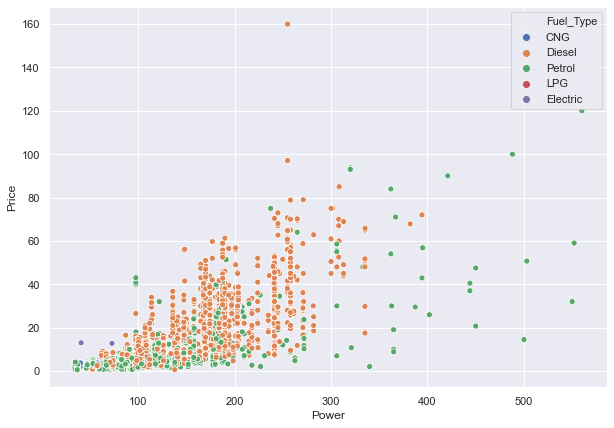

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='Price', x='Power',hue='Fuel_Type', data=df)

<li>higher power higher price independently from fuel type</li>

# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Price vs. Mileage regarding the type of transmission

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

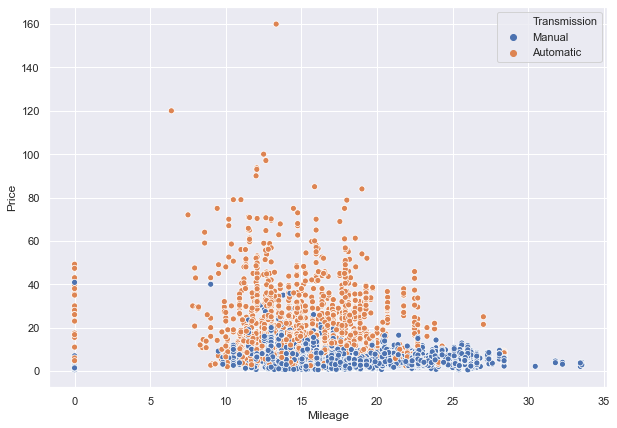

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='Price', x='Mileage',hue='Transmission', data=df)

<li>cars with higher Mileage are cheaper and cars with automatic transmission are more expensive</li>

<AxesSubplot:xlabel='Year', ylabel='Price'>

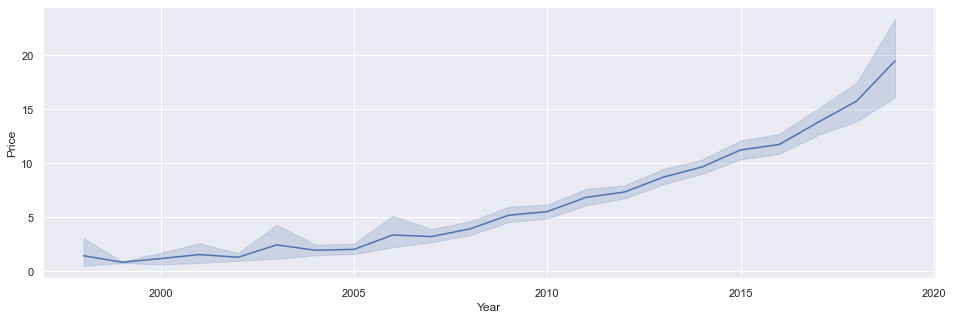

In [42]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Year', y='Price',data=df)

<li>younger cars are more expensive than oldes ones</li>

<AxesSubplot:xlabel='Year', ylabel='Price'>

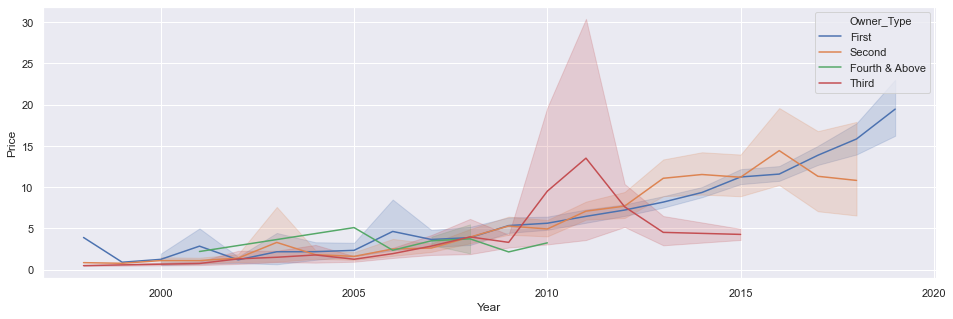

In [43]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Year', y='Price',hue='Owner_Type', data=df)

<li>interesting that the cars with only one owner show greater correlation between the manufactured years and price than the cars with more owners</li>

# <span style="font-family: Arial; font-weight:bold;color:#CD5C5C"> Number of owners of a car vs. price

<AxesSubplot:xlabel='Price', ylabel='Owner_Type'>

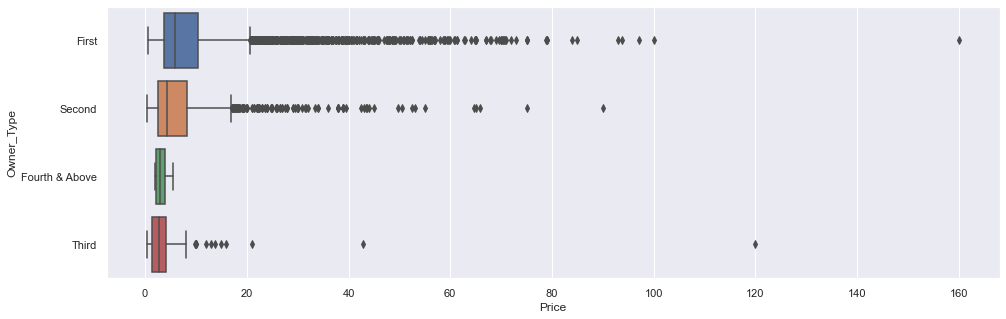

In [44]:
plt.figure(figsize=(16,5))
sns.boxplot(y='Owner_Type', x='Price', data=df)

<li>cars with more owners are cheaper</li>

## Observation
<hr>
<ul>
    <li>Price are higher for the more powerful cars</li>
    <li>The number of owners highly influence the price</li>
</ul>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   int32  
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int32  
 10  New_Price          824 non-null    float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 693.3+ KB


# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Preparation of data for the Model

In [46]:
# convert data to type "category"
df['Year'] = df['Year'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [47]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [66]:
df = treat_outliers_all(df,df_outl)

Mileage                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Engine               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Power                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Kilometers_Driven    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
New_Price              AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

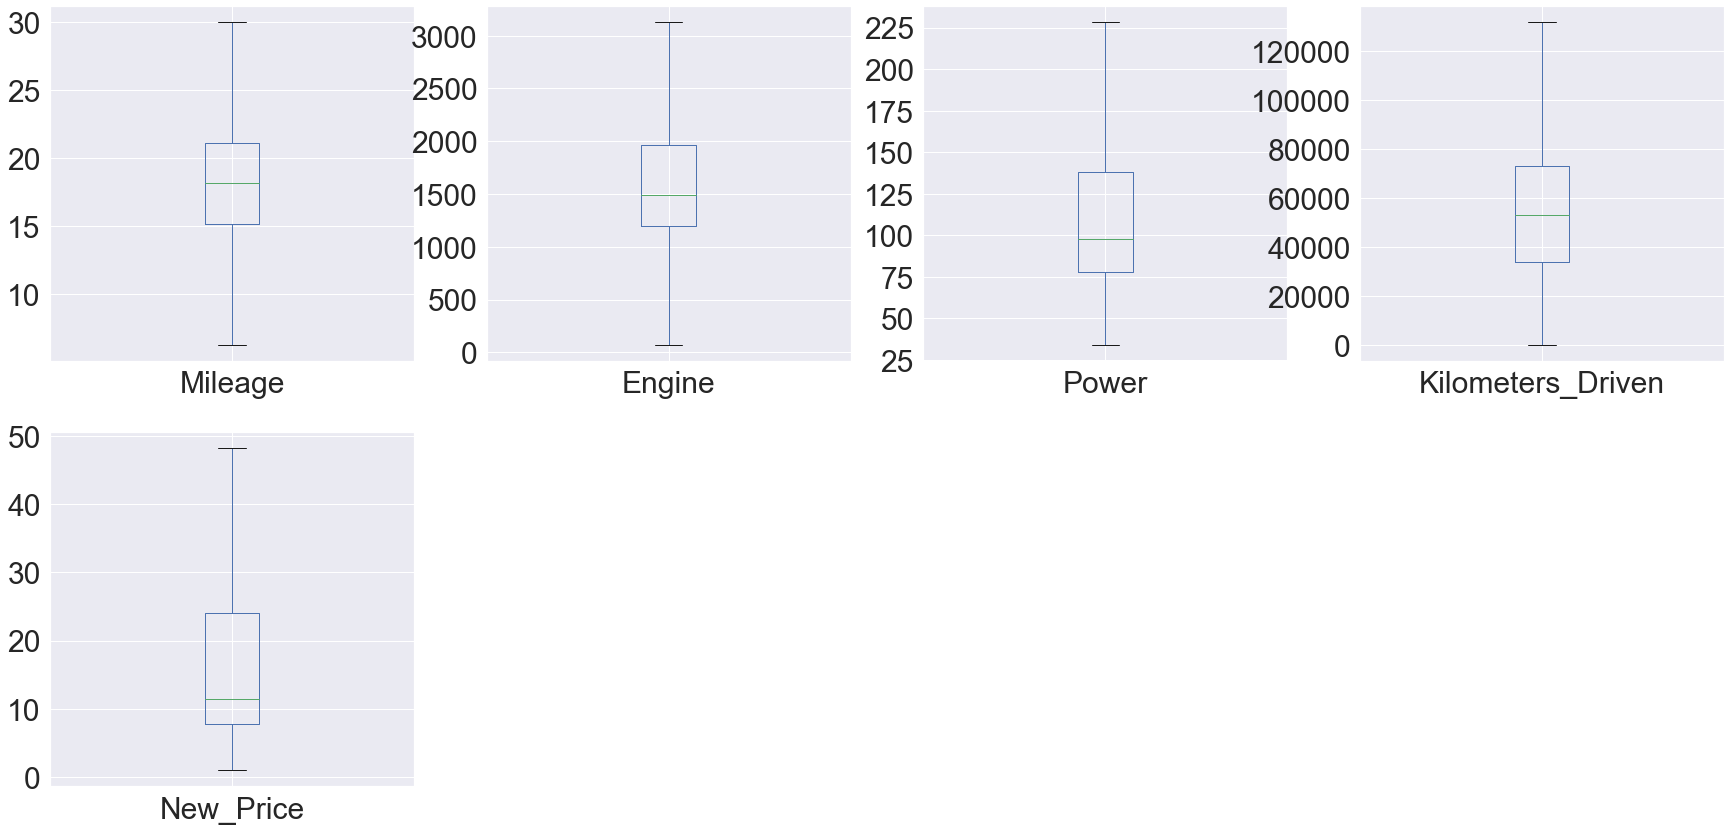

In [67]:
df_outl.plot(kind='box', subplots=True, layout=(4,4), fontsize=30, figsize = (30, 30))

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Modell building

In [50]:
df.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3599,Ahmedabad,2008,60000,Petrol,Manual,First,19.81,1086.00,68.05,5,NaN,1.99
3723,Chennai,2015,63714,Petrol,Manual,First,24.70,796.00,47.30,5,NaN,2.45
2473,Coimbatore,2018,68737,Diesel,Manual,First,26.21,1248.00,88.50,5,NaN,9.32
2644,Pune,2008,131500,Diesel,Manual,First,12.80,2494.00,102.00,8,NaN,5.90
4801,Hyderabad,2011,68000,Diesel,Automatic,First,12.39,2179.00,147.51,5,NaN,22.00
2459,Mumbai,2017,30000,Diesel,Manual,First,23.00,1498.00,98.96,5,11.89,8.99
597,Mumbai,2008,93000,Diesel,Manual,Third,10.50,2835.00,107.20,6,NaN,5.45
2646,Mumbai,2019,1000,Petrol,Manual,First,18.12,1196.00,86.80,5,NaN,6.80
662,Mumbai,2013,36000,Petrol,Automatic,First,14.80,1598.00,105.00,5,NaN,4.65
2543,Hyderabad,2013,58000,Diesel,Automatic,First,13.20,1995.00,170.00,5,NaN,19.50


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Defining variables (x,y)

In [51]:
X = df.drop(['Price','New_Price'], axis=1)
y = df[['Price']]

print(X.sample(10))
print(y.sample(10))

        Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1079        Pune  2016              58000    Diesel       Manual      First   
2300   Bangalore  2012              90000    Diesel       Manual     Second   
3746       Kochi  2013              87736    Diesel       Manual      First   
643   Coimbatore  2016              37882    Diesel       Manual      First   
3427   Hyderabad  2015              84000    Diesel       Manual      First   
1483   Hyderabad  2012              57156    Diesel    Automatic     Second   
1005       Delhi  2013              76000    Diesel    Automatic      First   
4476   Bangalore  2014              58000    Diesel    Automatic      First   
4368        Pune  2011              20575    Petrol       Manual      First   
938   Coimbatore  2017              63770    Diesel       Manual      First   

      Mileage  Engine  Power  Seats  
1079    22.90 1248.00  74.00      5  
2300    13.93 2179.00 138.03      7  
3746    15.10 21

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Creating dummy variables</span>
<ul>
    <li>Fuel type, transmission, owner type and location are not readable for the model so I create 3 dummy variables</li>

In [52]:
X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission','Owner_Type','Location'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.00,58.16,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.00,126.20,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.00,88.70,5,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.00,88.76,7,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.00,140.80,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Choose Model and evaluate</span>

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)  

LinearRegression()

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check the predicted values</span>

In [55]:
lin_reg_model.predict(X_train)

array([[ 1.58080571],
       [ 8.33050989],
       [11.7399492 ],
       ...,
       [ 9.6581811 ],
       [ 7.35177621],
       [ 2.39474444]])

In [56]:
y_train

,Price
4201,2.90
4383,4.50
1779,7.83
4020,3.85
3248,3.32
...,...
3772,6.75
5191,32.90
5226,9.00
5390,4.95


In [57]:
lin_reg_model.coef_

array([[ 7.69153975e-01, -5.99500106e-05, -1.55417265e-01,
         5.07231738e-03,  1.00868882e-01, -1.97435711e+00,
        -1.86272590e+00,  1.06999409e+01, -1.96496665e-01,
        -4.19978603e+00, -2.22008283e+00,  1.15031581e+00,
        -2.72083972e-02,  1.63274780e+00,  1.74745682e+00,
         9.17812456e-01,  2.68590946e+00, -1.79646982e-01,
         2.38297624e+00,  1.32227305e+00,  3.91881745e-02,
        -1.49834290e+00, -1.19135256e+00,  6.58790695e-01]])

In [58]:
lin_reg_model.intercept_

array([-1538.04522532])

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#CD5C5C">Train, evaluate and choosing model

In [59]:
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Check the interception and Coefficients of the model</span>

In [60]:
coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                           Coefficients
Year                               0.77
Kilometers_Driven                 -0.00
Mileage                           -0.16
Engine                             0.01
Power                              0.10
Seats                             -1.97
Fuel_Type_Diesel                  -1.86
Fuel_Type_Electric                10.70
Fuel_Type_LPG                     -0.20
Fuel_Type_Petrol                  -4.20
Transmission_Manual               -2.22
Owner_Type_Fourth & Above          1.15
Owner_Type_Second                 -0.03
Owner_Type_Third                   1.63
Location_Bangalore                 1.75
Location_Chennai                   0.92
Location_Coimbatore                2.69
Location_Delhi                    -0.18
Location_Hyderabad                 2.38
Location_Jaipur                    1.32
Location_Kochi                     0.04
Location_Kolkata                  -1.50
Location_Mumbai                   -1.19
Location_Pune                      0.66


In [61]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Model perfoarmance on training set

In [62]:
print(model_perf(lin_reg_model, X_train, y_train))

   MAE  MAPE  RMSE  R^2  Adjusted R^2
0 3.85 75.90  6.42 0.67          0.67


### <span style="font-family: Arial; font-weight:bold;color:#CD5C5C">Model perfoarmance on test set

In [63]:
print(model_perf(lin_reg_model, X_test, y_test))

   MAE  MAPE  RMSE  R^2  Adjusted R^2
0 3.94 83.68  6.17 0.69          0.69


## Observations and Conclusion
<hr>
<ol>
<li>MAE shows the residuals in absolut value and the magnitude</li>
<li>RMSE like MAE but it takes the square root of the residaul values, The testing and training RMSE 6.42 and 6.17 are near to each other so the model is good fit</li>
<li>$R^2$ are 0.67 and 0.69 so the modell is moderate satisfactory model should be improve</li>

## Advise for the business
<hr>
<strong>I would like to suggest:</strong>
<li>Try the get more cars from first owners</li>
<li>Younger used cars are much more expensive in the market</li>
<li>They have to focus on the cars with automatic transmission</li>
<li>There are less car with hight power and the price of this cars are definitiv higher</li>